In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy import stats

## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

La forma sugerida desde la web es:

```python

!pip install -q ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

```

Pero al revisar la metadata resulta más sencillo con:
 
```python
data = pd.read_csv('https://archive.ics.uci.edu/static/public/17/data.csv')
```

In [3]:
data = pd.read_csv('https://archive.ics.uci.edu/static/public/17/data.csv')
data.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


2. Renombrar las columnas en formato PascalCase.


In [4]:
# La notación actual es Snake_Case (La verdad prefiero esa jajaja)
PascalCase = lambda x: ''.join([word.capitalize() for word in x.split('_')])
data.columns = [PascalCase(col) for col in data.columns]

data.columns

Index(['Id', 'Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3', 'Diagnosis'],
      dtype='object')

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.


In [5]:
data.head()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [6]:
data.tail()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [7]:
data.describe()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 569 non-null    int64  
 1   Radius1            569 non-null    float64
 2   Texture1           569 non-null    float64
 3   Perimeter1         569 non-null    float64
 4   Area1              569 non-null    float64
 5   Smoothness1        569 non-null    float64
 6   Compactness1       569 non-null    float64
 7   Concavity1         569 non-null    float64
 8   ConcavePoints1     569 non-null    float64
 9   Symmetry1          569 non-null    float64
 10  FractalDimension1  569 non-null    float64
 11  Radius2            569 non-null    float64
 12  Texture2           569 non-null    float64
 13  Perimeter2         569 non-null    float64
 14  Area2              569 non-null    float64
 15  Smoothness2        569 non-null    float64
 16  Compactness2       569 non

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?


In [9]:
data.isnull().sum()

Id                   0
Radius1              0
Texture1             0
Perimeter1           0
Area1                0
Smoothness1          0
Compactness1         0
Concavity1           0
ConcavePoints1       0
Symmetry1            0
FractalDimension1    0
Radius2              0
Texture2             0
Perimeter2           0
Area2                0
Smoothness2          0
Compactness2         0
Concavity2           0
ConcavePoints2       0
Symmetry2            0
FractalDimension2    0
Radius3              0
Texture3             0
Perimeter3           0
Area3                0
Smoothness3          0
Compactness3         0
Concavity3           0
ConcavePoints3       0
Symmetry3            0
FractalDimension3    0
Diagnosis            0
dtype: int64

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.


In [10]:
data['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```


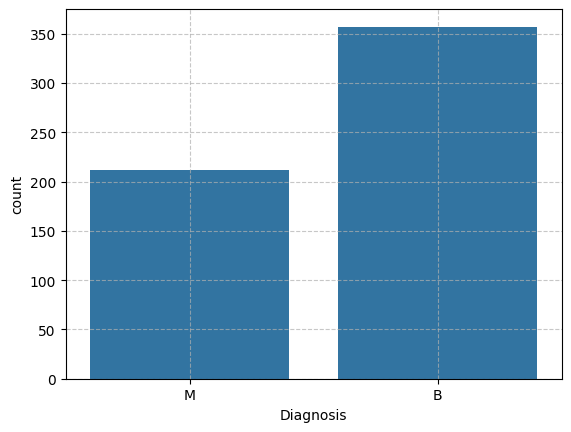

In [11]:
sns.countplot(data=data, x='Diagnosis')
plt.grid(True, alpha=0.7, linestyle='--')
plt.show()

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


In [12]:
lambda x: 0 if x == 'B' else 1

data['DiagnosisNumeric'] = data['Diagnosis'].apply(lambda x: 0 if x == 'B' else 1)
data.head()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis,DiagnosisNumeric
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M,1


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`


In [13]:
normalize = lambda x: (x - x.mean()) / x.std()

# Columnas para normalizar
cols_to_normalize = [col for col in data.columns if data[col].dtype == 'float64' or data[col].dtype == 'int64']

# Las variables categoricas no se normalizan
cols_to_normalize.remove('DiagnosisNumeric')
cols_to_normalize.remove('Id')

# Normalizar las columnas
data[cols_to_normalize] = normalize(data[cols_to_normalize])
data

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis,DiagnosisNumeric
0,842302,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,M,1
1,842517,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,M,1
2,84300903,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,M,1
3,84348301,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,M,1
4,84358402,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,M,1
565,926682,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,M,1
566,926954,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,...,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,M,1
567,927241,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,M,1


9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


In [14]:
# Obtener los patrones únicos y eliminar los categoricos
unique_patterns = list(set([re.match(r'^[a-zA-Z_]+', string).group(0) for string in data.columns]))
unique_patterns.remove('DiagnosisNumeric')
unique_patterns.remove('Diagnosis')
unique_patterns.remove('Id')

#! Ejecutar solo una vez

# Crear nuevas columnas
for expr in unique_patterns:
    # Obtener las columnas que coinciden con el patron
    matches = [re.match(r"{}(.*)".format(expr), col) for col in data.columns]
    result = [m.group(0) for m in matches if m]  # Filtra los None

    # Nueva columna con los promedios
    data[expr + 'Mean'] =  np.mean(data[result], axis=1)
    # print(expr)

# Imprimir columnas agregadas
new_cols = [col + 'Mean' for col in unique_patterns]
print(new_cols)

['ConcavityMean', 'AreaMean', 'SmoothnessMean', 'TextureMean', 'RadiusMean', 'CompactnessMean', 'FractalDimensionMean', 'PerimeterMean', 'SymmetryMean', 'ConcavePointsMean']


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.


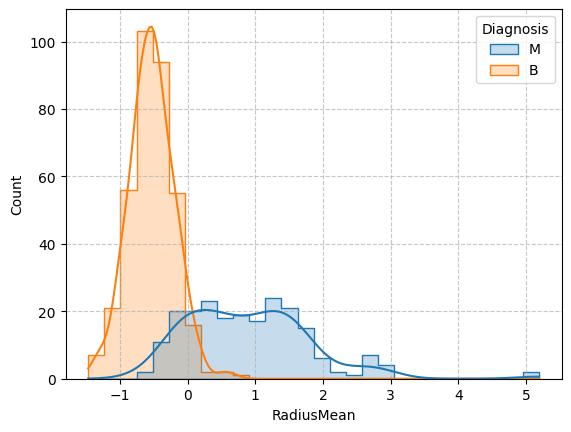

In [15]:
sns.histplot(data=data, x='RadiusMean', hue='Diagnosis', element='step', kde=True)
plt.grid(True, alpha=0.7, linestyle='--')
plt.show()

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


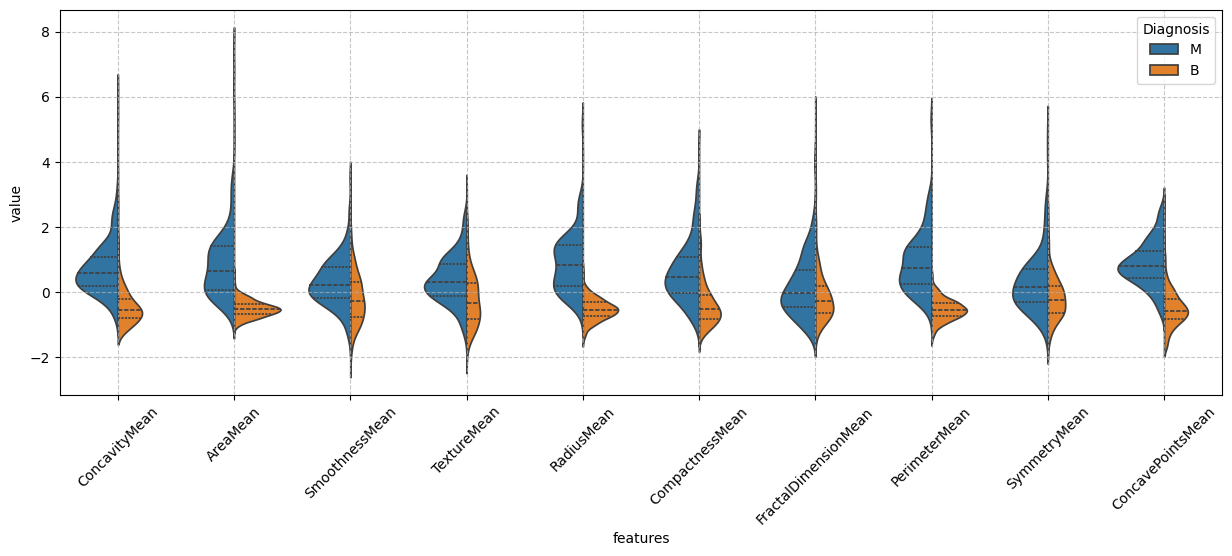

In [16]:
if 'Diagnosis' not in new_cols:
    # Condicional para evitar errores 
    new_cols.append('Diagnosis')

data_melt = pd.melt(data[new_cols], id_vars='Diagnosis', var_name="features", value_name="value")

plt.figure(figsize=(15,5))
sns.violinplot(data=data_melt, x='features', y='value', hue='Diagnosis', split=True, inner='quart')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.7, linestyle='--')
plt.show()

12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```


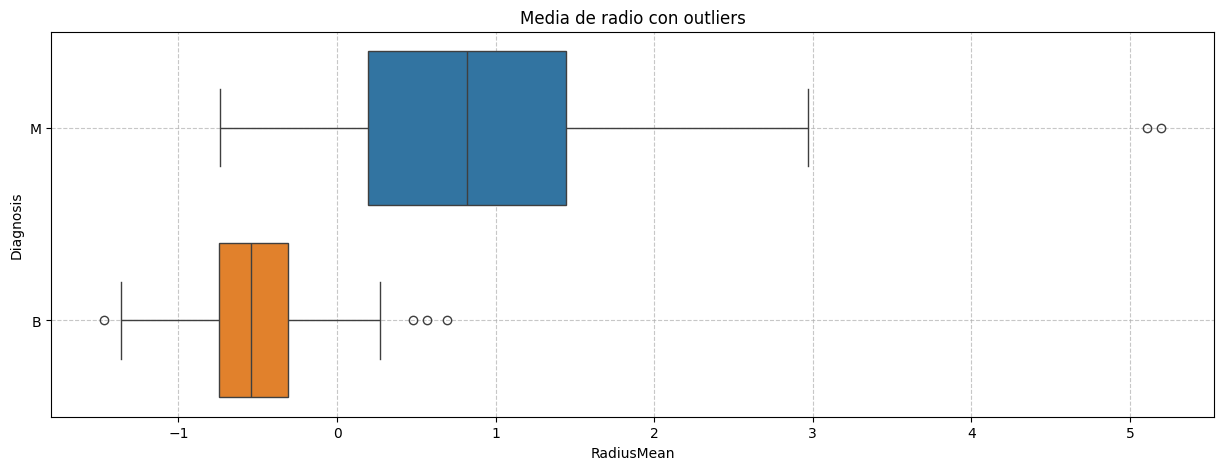

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='RadiusMean', y='Diagnosis', hue='Diagnosis')
plt.grid(True, alpha=0.7, linestyle='--')
plt.title('Media de radio con outliers')
plt.show()

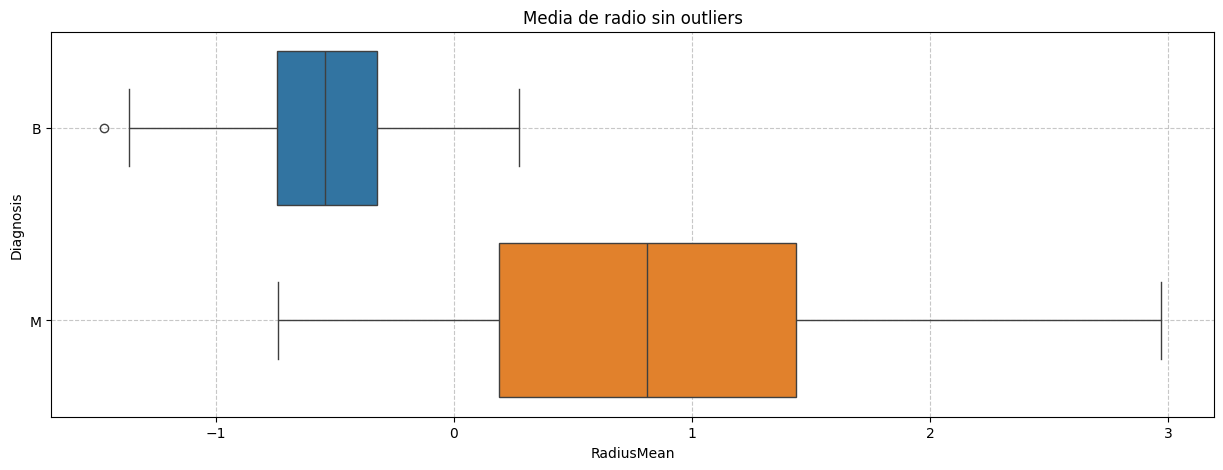

In [18]:
# Eliminar Outliers
# Filtrar por B o M -> Obtener Z score filtrado -> Filtrar outliers
data_no_out_B = data[data['Diagnosis'] == 'B'][np.abs(stats.zscore(data[data['Diagnosis'] == 'B']['RadiusMean'])) < 3]
data_no_out_M = data[data['Diagnosis'] == 'M'][np.abs(stats.zscore(data[data['Diagnosis'] == 'M']['RadiusMean'])) < 3]

# Unir de nuevo
data_no_out = pd.concat([data_no_out_B, data_no_out_M])

# Plot
plt.figure(figsize=(15,5))
sns.boxplot(data=data_no_out, x='RadiusMean', y='Diagnosis', hue='Diagnosis')
plt.grid(True, alpha=0.7, linestyle='--')
plt.title('Media de radio sin outliers')
plt.show()


13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.


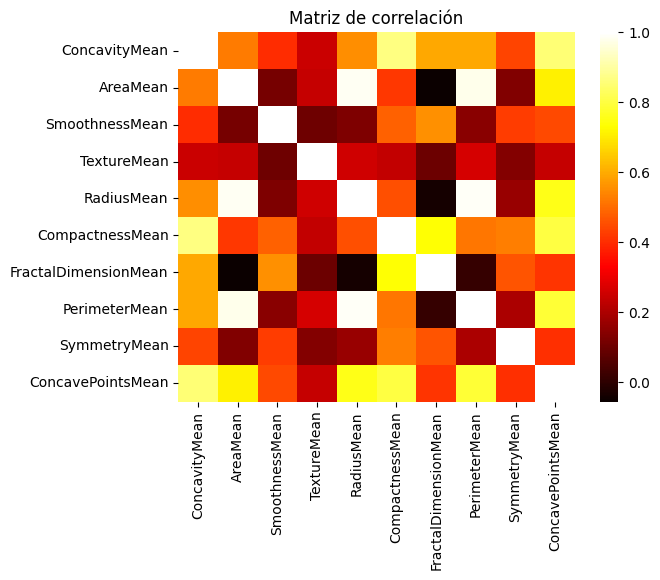

In [19]:
if 'Diagnosis' in new_cols:
    new_cols.remove('Diagnosis')

corr = data[new_cols].corr()

sns.heatmap(corr, cmap='hot')
plt.title('Matriz de correlación')
plt.show()

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?


Con esta visualización superpuesta, notamos porque es posible hacer la media de las caracteristicas como una sola distribución. Según entendí del paper cada radio (o caracteristica derivada) se extrae del análisi de la imagen de la celula, y al final el radio, u otra caracteristica, sera la media de la caracteristica

> The radius of an individual nucleus is measured by averaging the length of the radial line segments de ned by the centroid of the snake and the individual snake points


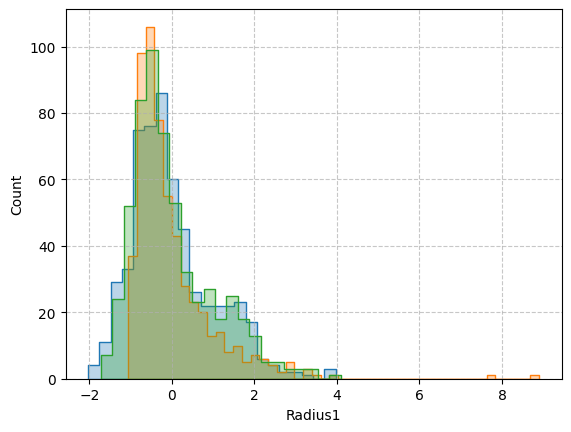

In [ ]:
sns.histplot(data=data, x='Radius1', element='step', alpha=0.3)
sns.histplot(data=data, x='Radius2', element='step', alpha=0.3)
sns.histplot(data=data, x='Radius3', element='step', alpha=0.3)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Como tenemos la variable categorica Diagnosis, es interesante ver si visualmente parece seguir un patrón dependiente de las caracteristicas. Interesante para un análisis de clasificación

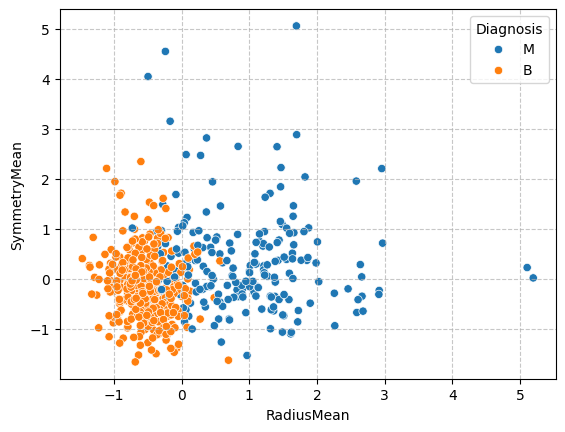

In [37]:
sns.scatterplot(data=data, x='RadiusMean', y='SymmetryMean', hue='Diagnosis')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

siguiendo lo que propone el arítculo sobre la dimensión fractal 
> As with all the shape features a higher value corresponds to a less regular contour and thus to a higher probability of malignancy


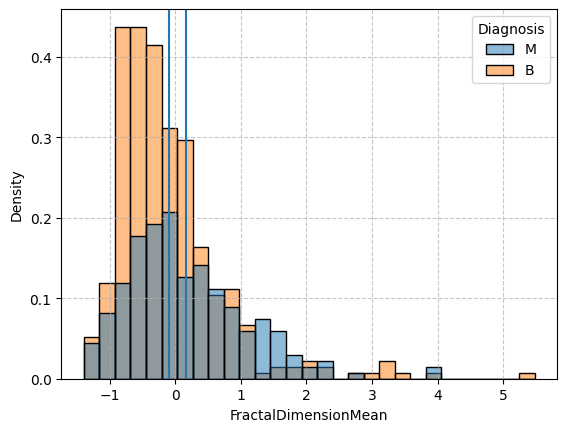

In [52]:
sns.histplot(data=data, x='FractalDimensionMean', hue='Diagnosis', stat='density')
plt.axvline(data[data['Diagnosis']=='M']['FractalDimensionMean'].mean())
plt.axvline(data[data['Diagnosis']=='B']['FractalDimensionMean'].mean())

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='FractalDimensionMean', ylabel='PerimeterMean'>

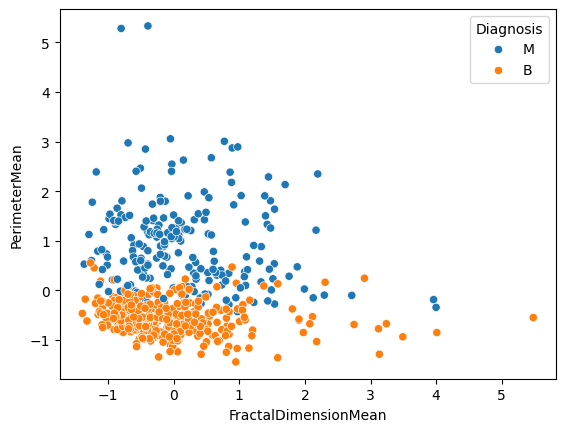

In [54]:
sns.scatterplot(data=data, x='FractalDimensionMean', y='PerimeterMean', hue='Diagnosis')

<Axes: xlabel='FractalDimensionMean', ylabel='AreaMean'>

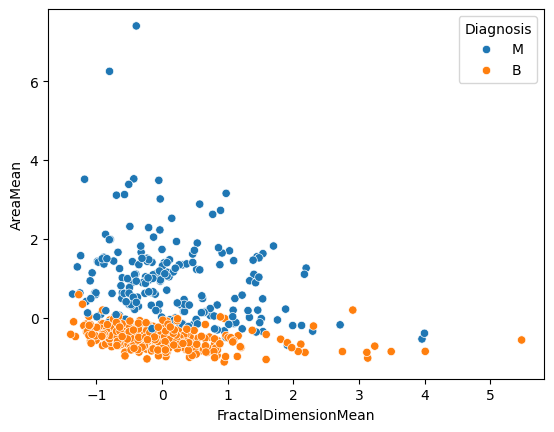

In [55]:
sns.scatterplot(data=data, x='FractalDimensionMean', y='AreaMean', hue='Diagnosis')

In [ ]:
filtro = lambda x: 1 if x=='M' else 0
data[new col] = data[col].apply(lambda)

<function __main__.<lambda>(x)>